In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

/tmp/ipykernel_10337/82325636.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from math import sqrt, log
sns.set_style("darkgrid")

In [3]:
path = '../data/' 
hotels = pd.read_csv('../data/features_hotels.csv') # à tester, sans ces données

data = pd.read_csv(path+"data.csv")
data = data.merge(hotels, on=['hotel_id','city'])
data_test = pd.read_csv(path+'test_set.csv') # ignore index 
data_test['request_number'] = data_test['order_requests']
data_test = data_test.merge(hotels, on=['hotel_id','city']) 

data.head()

,city,date,language,mobile,request_number,avatar_id,hotel_id,price,stock,group,brand,parking,pool,children_policy
0,valletta,2,bulgarian,1,1,134,55,109,10,Boss Western,Boss Western,1,0,0
1,valletta,32,bulgarian,1,1,167,55,100,49,Boss Western,Boss Western,1,0,0
2,valletta,32,hungarian,0,1,179,55,100,49,Boss Western,Boss Western,1,0,0
3,valletta,5,danish,1,1,197,55,129,0,Boss Western,Boss Western,1,0,0
4,valletta,36,danish,1,1,203,55,110,64,Boss Western,Boss Western,1,0,0


In [6]:
data.dtypes

city               object
date                int64
language           object
mobile              int64
request_number      int64
avatar_id           int64
hotel_id            int64
price               int64
stock               int64
group              object
brand              object
parking             int64
pool                int64
children_policy     int64
dtype: object

In [7]:
for col in ['city', 'language', 'avatar_id', 'hotel_id', 'group', 'brand','children_policy'] :
    data[col] = pd.Categorical(data[col],ordered=False)
    data_test[col] = pd.Categorical(data_test[col],ordered=False)
    
data.dtypes

city               category
date                  int64
language           category
mobile                int64
request_number        int64
avatar_id          category
hotel_id           category
price                 int64
stock                 int64
group              category
brand              category
parking               int64
pool                  int64
children_policy    category
dtype: object

In [8]:
colQT = ['request_number', 'stock']

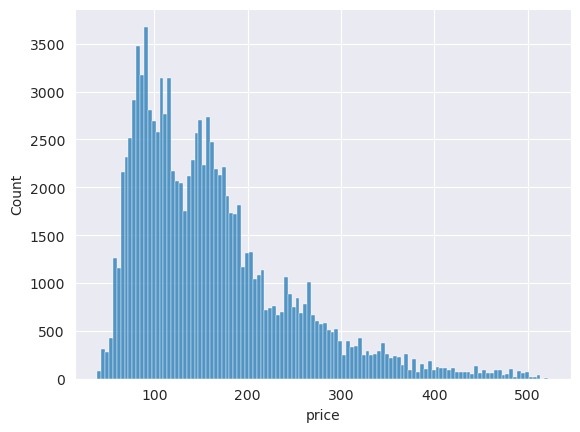

In [9]:
plt.figure()
sns.histplot(data['price'])
plt.show()

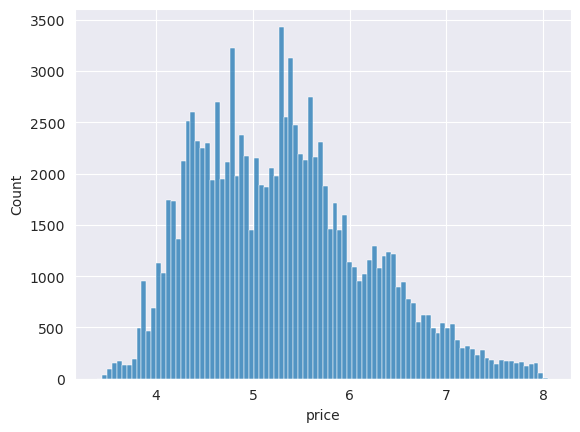

In [10]:
plt.figure()
sns.histplot(data['price'].map(lambda x: x**(1/3)))
plt.show()

In [11]:
# data['SRprice'] = data['price'].map(lambda x: x**(1/3))

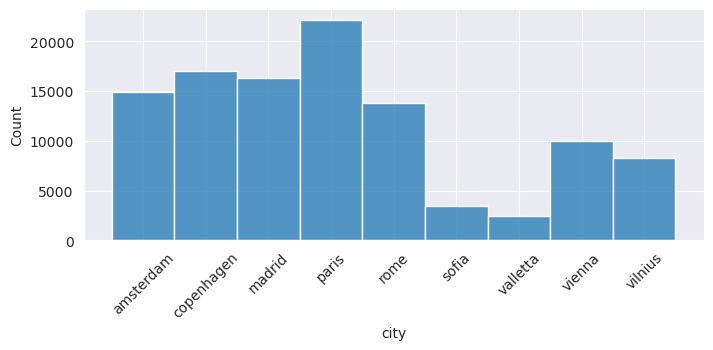

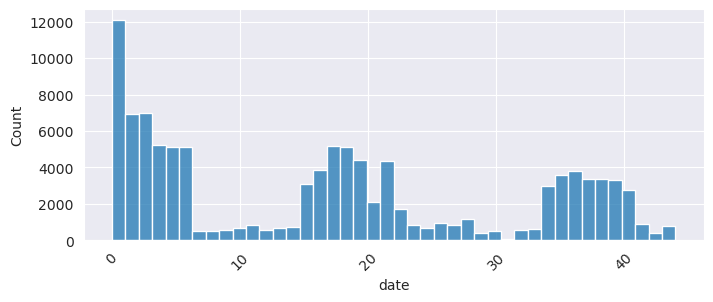

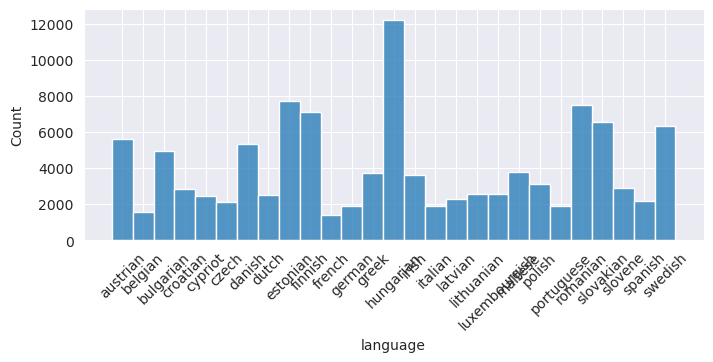

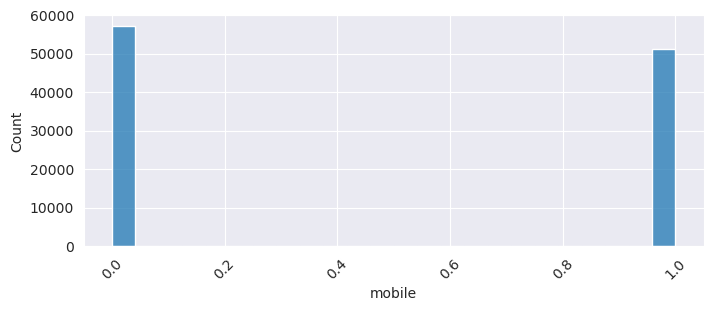

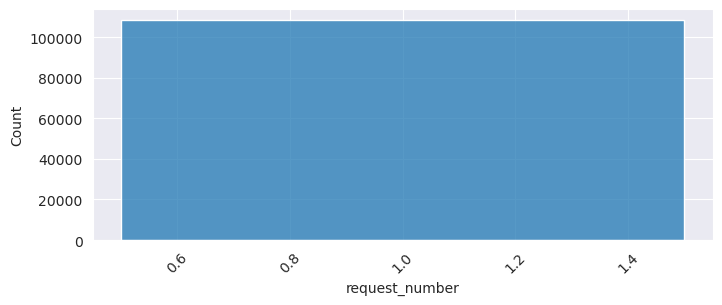

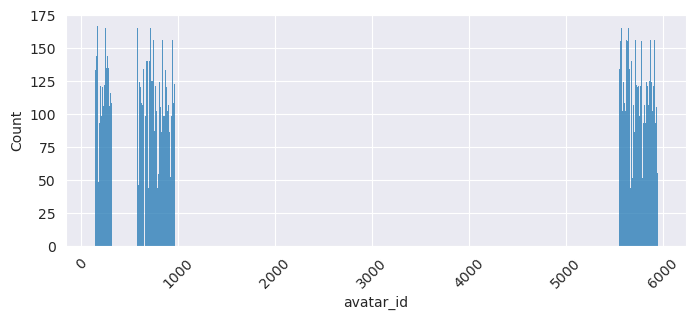

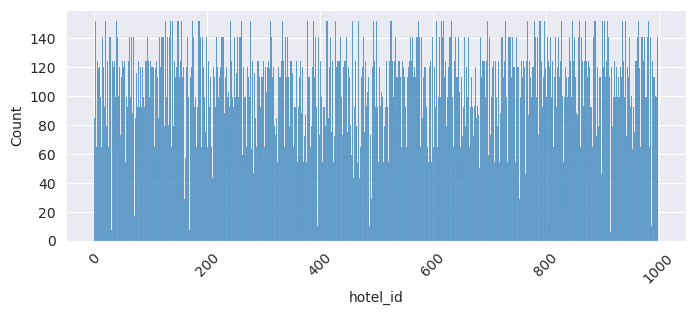

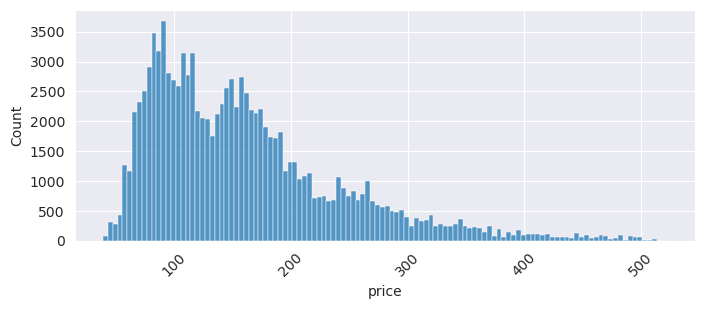

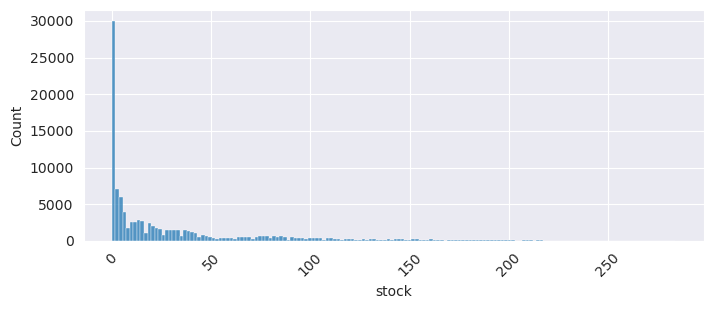

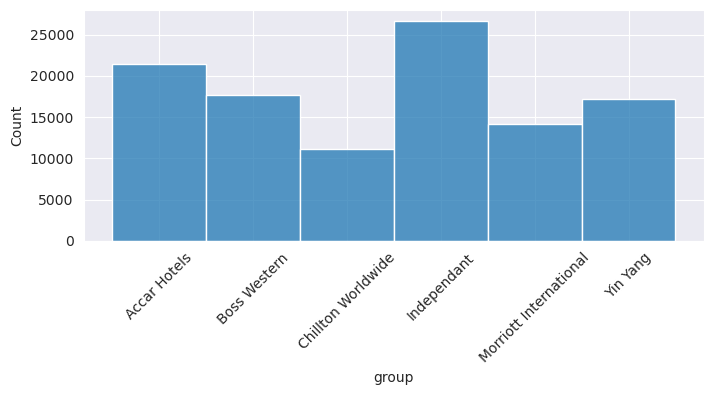

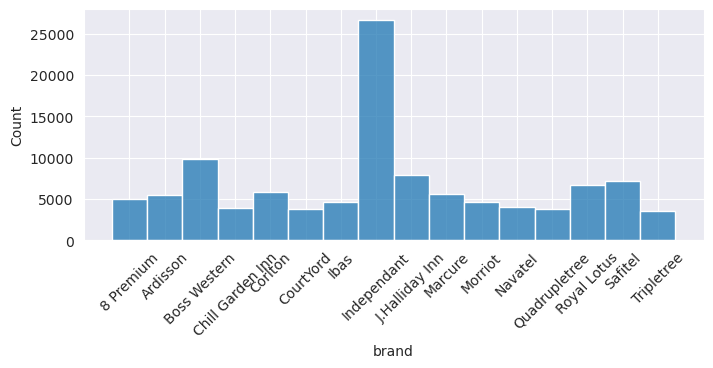

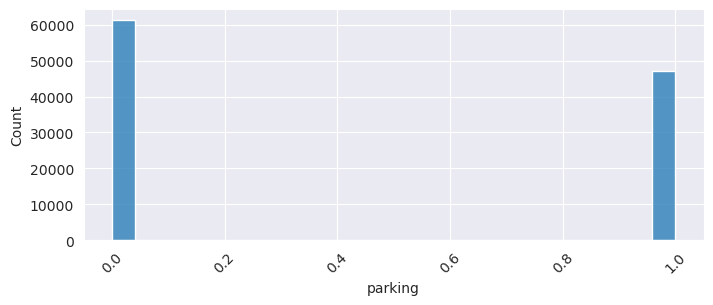

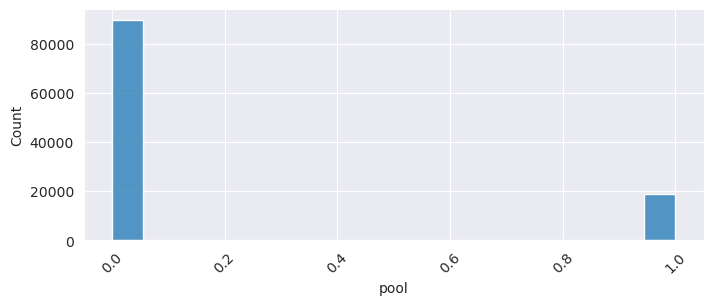

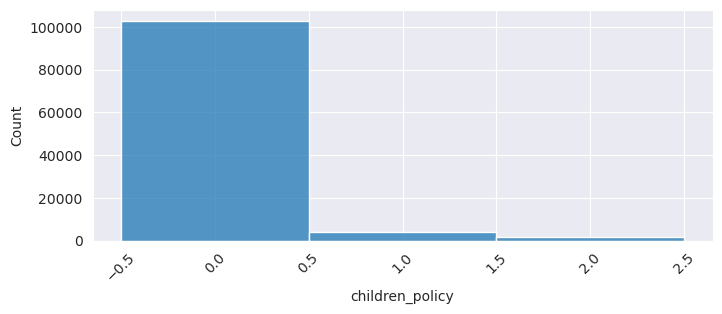

In [12]:
for col in data.columns:
    plt.figure(figsize=(8,3))
    sns.histplot(data[col])
    plt.xticks(rotation=45)
    plt.show()

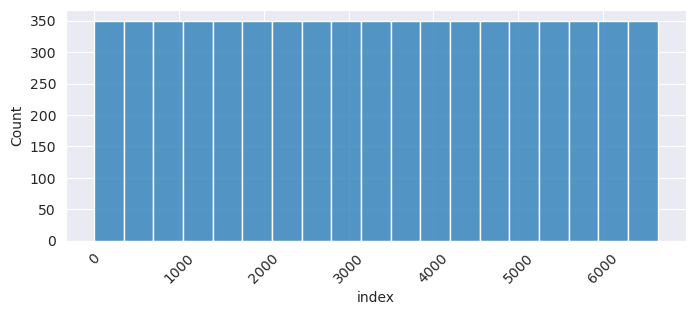

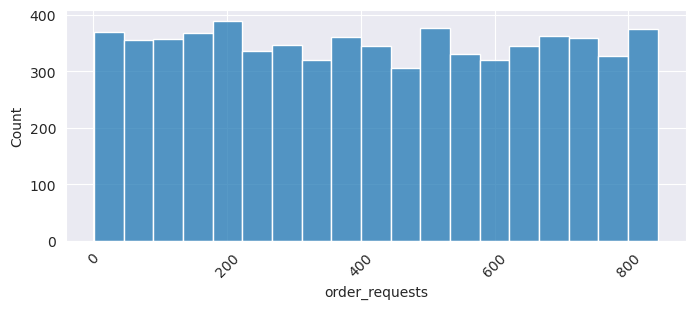

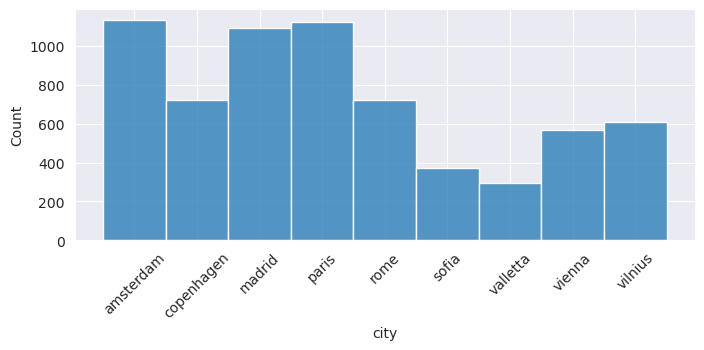

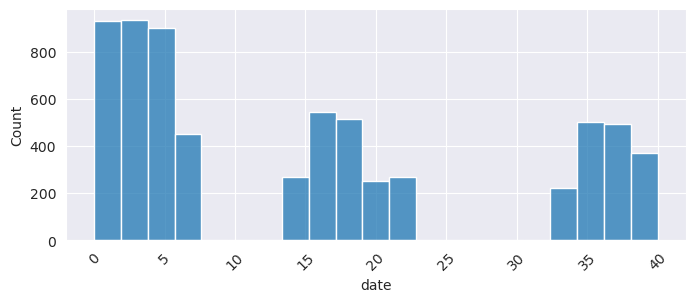

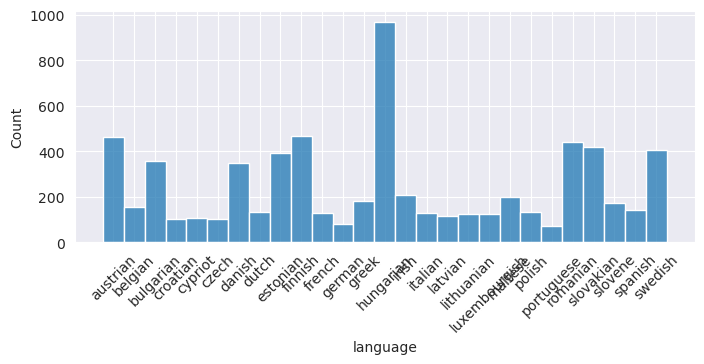

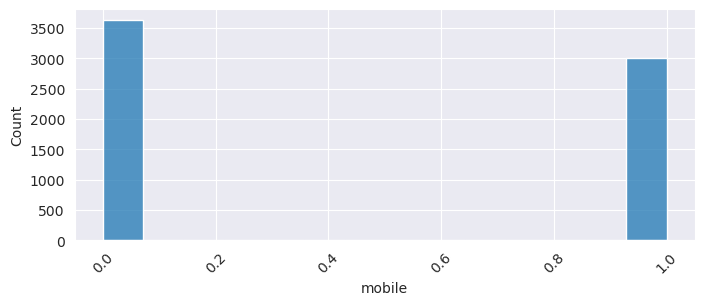

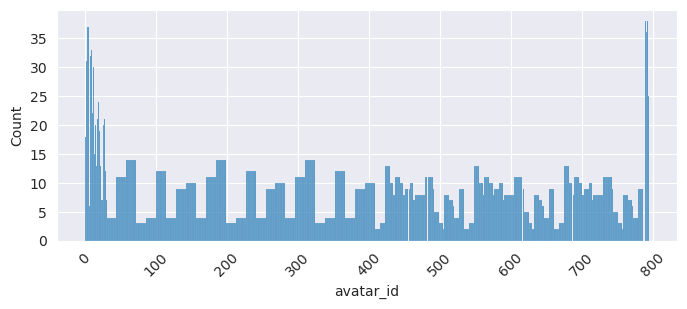

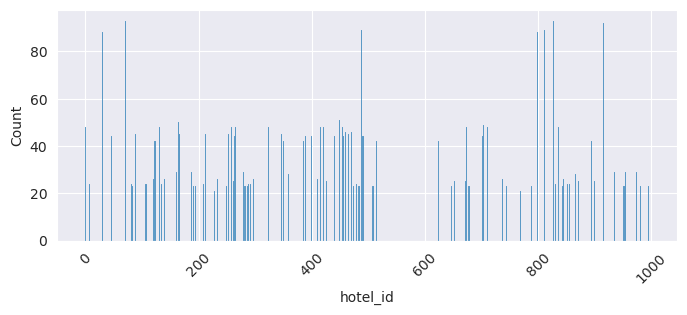

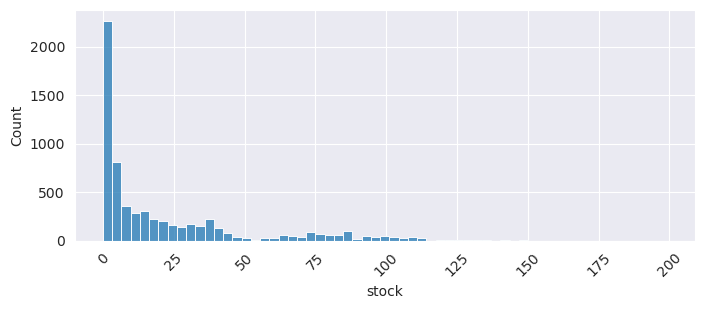

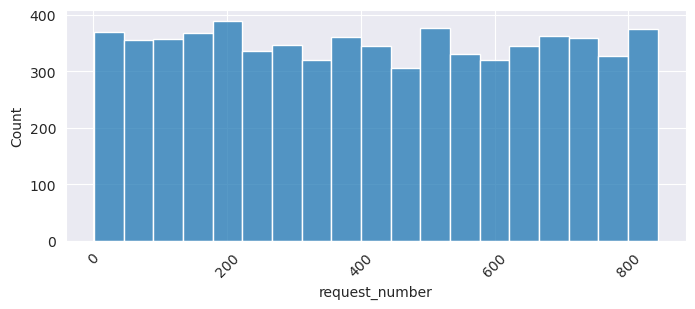

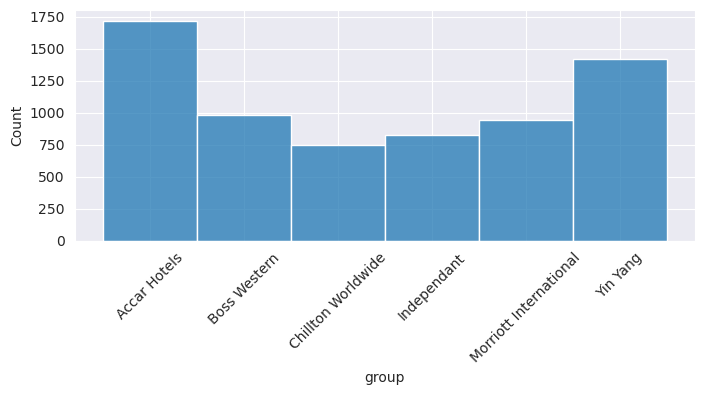

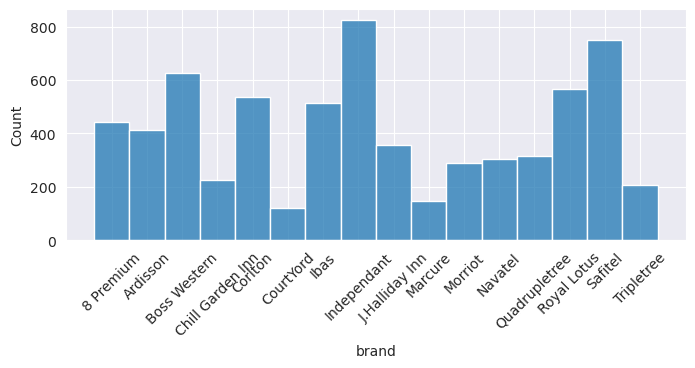

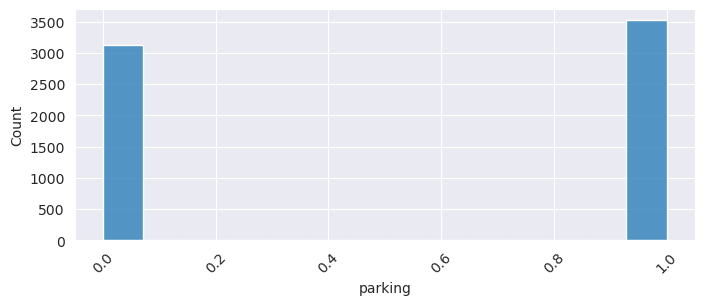

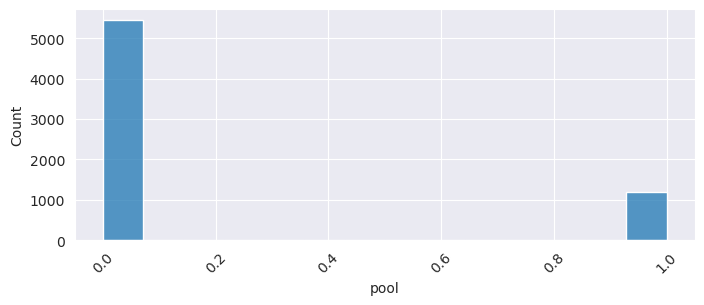

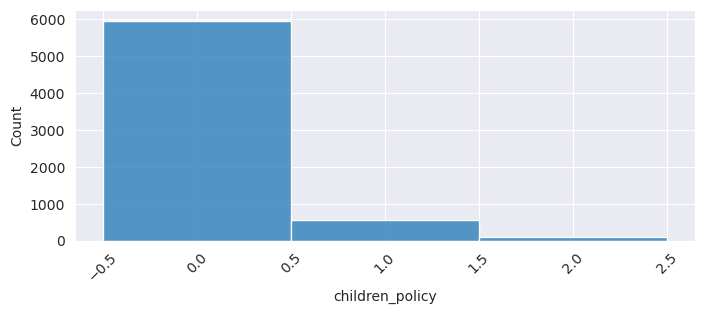

In [13]:
for col in data_test.columns:
    plt.figure(figsize=(8,3))
    sns.histplot(data_test[col])
    plt.xticks(rotation=45)
    plt.show()

In [14]:
dataDum = pd.get_dummies(data[['city','language','mobile','hotel_id','group','brand','parking','pool','children_policy']])
del dataDum['city_amsterdam']
del dataDum['language_hungarian']
del dataDum['hotel_id_0']
del dataDum['group_Accar Hotels']
del dataDum['brand_8 Premium']
del dataDum['children_policy_0']

# on Test Set

dataDum_test = pd.get_dummies(data_test[['city','language','mobile','hotel_id','group','brand','parking','pool','children_policy']])
del dataDum_test['city_amsterdam']
del dataDum_test['language_hungarian']
del dataDum_test['hotel_id_0']
del dataDum_test['group_Accar Hotels']
del dataDum_test['brand_8 Premium']
del dataDum_test['children_policy_0']

In [15]:
# First work without order request 
del colQT[0]

In [16]:
dataQt = data[colQT]
dataQt_test = data_test[colQT]

In [17]:
df = pd.concat([dataDum,dataQt],axis=1)
df_test = pd.concat([dataDum_test,dataQt_test],axis=1)
df.head()

,mobile,parking,pool,city_copenhagen,city_madrid,city_paris,city_rome,city_sofia,city_valletta,city_vienna,...,brand_Marcure,brand_Morriot,brand_Navatel,brand_Quadrupletree,brand_Royal Lotus,brand_Safitel,brand_Tripletree,children_policy_1,children_policy_2,stock
0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,10
1,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,49
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,49
3,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,64


In [18]:
df.shape

(108401, 1058)

In [19]:
df_test.shape

(6644, 244)

In [ ]:
# variable à expliquer réelle
Yr = data['price']

In [ ]:
# séparation pour les tests et tunner les modèles
from sklearn.model_selection import train_test_split  
X_train,X_test,Yr_train,Yr_test=train_test_split(df,Yr,test_size=.25,random_state=11) #25% pour le test_size

In [ ]:
# séparation pour submit
X_train = df
X_test = df_test
Yr_train = Yr
Yr_test = None

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
# standardisation des données
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)

# Boosting

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# définition des paramètres
boost = GradientBoostingRegressor()
# apprentissage
rfFit = boost.fit(Xr_train,Yr_train)

In [ ]:
# erreur de prédiction sur le test
1-rfFit.score(Xr_test,Yr_test)

In [ ]:
# prédiction
y_pred = rfFit.predict(Xr_test)
print("MSE =",mean_squared_error(y_pred,Yr_test))
print("R2 =",r2_score(Yr_test,y_pred))